In [1]:
import sys
sys.path.append('..')
from hamp_pred.src.predictor import Predictor
from hamp_pred.src.predictor_config import DEFAULT_CONF, PredictionConfig,SEQ_ENCODING_EXTERNAL
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from Bio import SeqIO
import tensorflow as tf
from hamp_pred.external.SequenceEncoding.SequenceEncoding import SequenceEncoding, get_dict
from hamp_pred.src.input_prep.encode import OneHotEncoderSeq, RadianEncoder, MixedEncoder, MultiEncoder
from hamp_pred.src.input_prep.prepare_sequence import MultiChainOperator, SeqWindow
from hamp_pred.src.models.common.models import BaseConvolutionalWrapper, BaseLinearWrapper
from hamp_pred.src.input_prep.encode import RadiousPhobosEncoder
from keras.utils.vis_utils import plot_model
from Bio.PDB.PDBParser import PDBParser
import os
import matplotlib.pyplot as plt

## Train full seq model

In [3]:
data = pd.read_pickle('../data/input/full_alpha_data.p')
val_ids = set(data[data['class'] == 'val'].index)
idx = list(data.index)
operator = MultiChainOperator(MultiEncoder([RadiousPhobosEncoder(), OneHotEncoderSeq()]), SeqWindow(60, 60), RadianEncoder(100),  SeqWindow(60, 60, null_char=[[0]]),
                                      parallel=True, n_chains=1, chain_names=('seq', ))
model_conf = model_config = {
    'activation': 'linear',
    'norm': True,
    'n_layers': 3,
    'kernel_sizes': (3, 5, 7, 11),
    'lstm': 2,
    'dense': 2,
    'reshape_out': False,
    'epochs': 300
}
conf = PredictionConfig(BaseConvolutionalWrapper, operator, model_conf)
pred = Predictor('hamp_crick_single_sequence', config=conf)
trained = pred.train(data, val_ids=val_ids, ids=idx)

2023-03-31 19:50:14.519725: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/300
61/61 [==============================] - 37s 602ms/sample - loss: 0.2586 - mae: 0.3213 - val_loss: 0.2346 - val_mae: 0.3383 - lr: 0.0010
Epoch 2/300
61/61 [==============================] - 30s 487ms/sample - loss: 0.0181 - mae: 0.0743 - val_loss: 0.0537 - val_mae: 0.1263 - lr: 0.0010
Epoch 3/300
61/61 [==============================] - 31s 507ms/sample - loss: 0.0100 - mae: 0.0528 - val_loss: 0.0216 - val_mae: 0.0831 - lr: 0.0010
Epoch 4/300
61/61 [==============================] - 30s 487ms/sample - loss: 0.0075 - mae: 0.0448 - val_loss: 0.0156 - val_mae: 0.0622 - lr: 0.0010
Epoch 5/300
61/61 [==============================] - 32s 523ms/sample - loss: 0.0073 - mae: 0.0494 - val_loss: 0.0407 - val_mae: 0.1569 - lr: 0.0010
Epoch 6/300
61/61 [==============================] - 59s 967ms/sample - loss: 0.0084 - mae: 0.0530 - val_loss: 0.0122 - val_mae: 0.0484 - lr: 0.0010
Epoch 7/300
61/61 [==============================] - 54s 882ms/sample - loss: 0.0052 - mae: 0.0339 - val_l

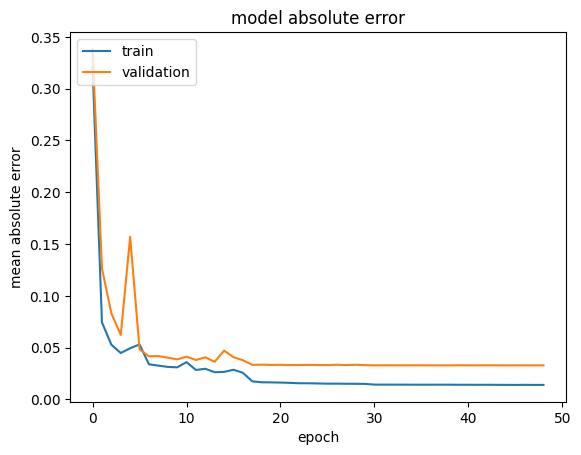

In [4]:
plt.plot(trained.history.history['mae'])
plt.plot(trained.history.history['val_mae'])
plt.title('model absolute error')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

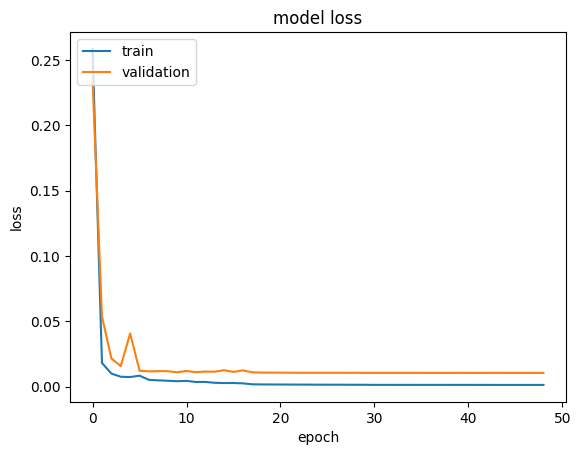

In [5]:
plt.plot(trained.history.history['loss'])
plt.plot(trained.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()